In [113]:
import numpy as np
import pandas as pd
import pyodbc as pyodbc
import os
import re
from sklearn.cluster import KMeans # K-means algorithm
from sklearn.cluster import AgglomerativeClustering # hierarchial clustering algorithm
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
import itertools
from sklearn import metrics
from sklearn.impute import SimpleImputer
from pandas.api.types import is_string_dtype, is_numeric_dtype
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import silhouette_score
import statsmodels.api as sm
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,roc_auc_score,roc_curve, auc
from bioinfokit.visuz import stat
from sklearn.preprocessing import StandardScaler
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek,SMOTEENN
from statsmodels.api import add_constant
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('bank-additional-full.csv')

In [3]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
data.columns.to_list()

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
#based on attribute information  Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
data= data.drop(['duration'],axis=1)

Important point of this project is to derive influence or learnings by understanding features

# Exploratory Data Analysis

## Attributes 

In [7]:
def Variables(df):
    cat_list = []
    num_list = []
    for column in df:
        if is_string_dtype(df[column]):
            cat_list.append(column)
        if is_numeric_dtype(df[column]):
            num_list.append(column)
    return(cat_list,num_list)

In [8]:
def Distribution(df,lists,cat_list,num_list):
    for i in lists:
        print('---------------------',i,'---------------------')
        print(data[i].value_counts())
        if i in cat_list:
            plt.figure()
            data[i].value_counts().plot(kind='bar', color='steelblue')
            plt.plot()

In [9]:
cat_list,num_list =Variables(data)

In [10]:
def VisualizeConvertedNumeric(df,col):
    #visualize numberic variables in respect to converted yes/no
    dataframe = pd.concat([df[num_list], previous['y']], axis=1)
    plt.figure(figsize=(7,5))
    sns.distplot(dataframe.loc[dataframe.y == 'yes',col], hist=False,color='black',label='yes');
    sns.distplot(dataframe.loc[dataframe.y == 'no',col], hist=False,color='red',label='no');
    plt.legend();

In [11]:
def JobSuccessRate(df,lists,col):
    for i in lists:
        df2 = df[df[col] == i]
        print("Success Rate for ", i, " in campaign", round(df2.y.apply(lambda x: 1 if x== 'yes' else 0).sum()/len(df2),2))

### Related to customer information

In [12]:
custInfo = ['age','job','marital','education','default','housing','loan']

--------------------- age ---------------------
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64
--------------------- job ---------------------
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
--------------------- marital ---------------------
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
--------------------- education ---------------------
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: edu

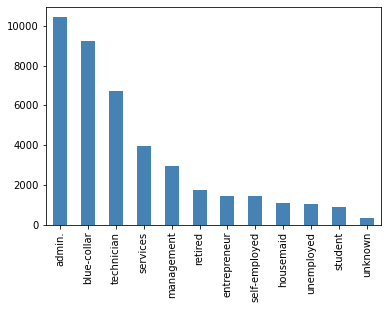

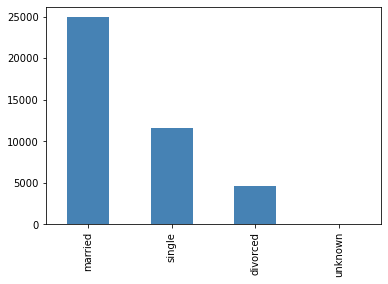

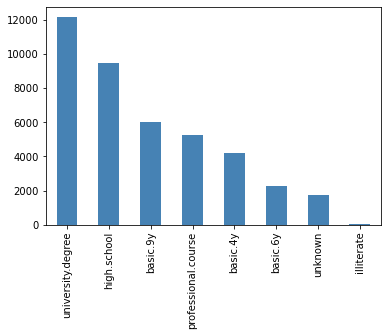

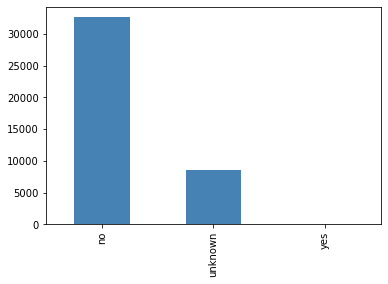

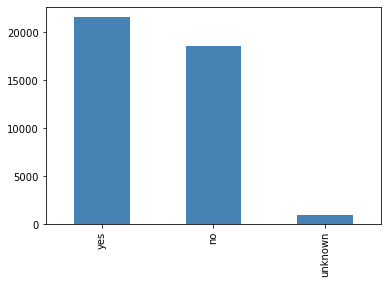

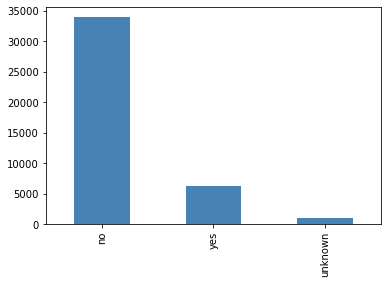

In [13]:
Distribution(data,custInfo,cat_list,num_list)

In [14]:
age = data.age.value_counts().reset_index()[:20]

###### Visualizing customer who participated in previous campaign to understand how variables are affecting conversion

In [15]:
def VisualizeConverted(df,col):
  #visualizing how job grade is corresponding to conversion
    plt.figure(figsize = (12,5))
    ax1=sns.countplot(x = col, hue = "y", data = df)
    ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
    plt.show()  

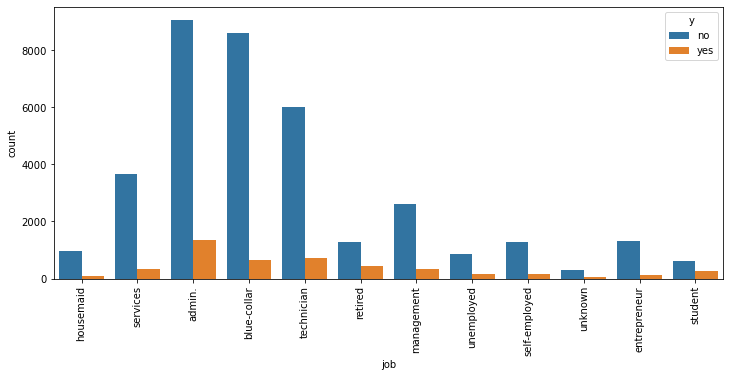

In [16]:
VisualizeConverted(data,'job')

In [17]:
poutcomes = data[data.poutcome != 'nonexistent'].poutcome.apply(lambda x: 1 if x == 'success' else 0)
coutcomes = data.y.apply(lambda x: 1 if x == 'yes' else 0)

print('Number of records:', len(data))
print('Success Rate (Current Campaign):', coutcomes.sum() / len(data))
print('Success Rate (Previous Campaign):', poutcomes.sum() / len(poutcomes))

Number of records: 41188
Success Rate (Current Campaign): 0.11265417111780131
Success Rate (Previous Campaign): 0.24408888888888888


In [18]:
data.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [19]:
data.poutcome.value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [20]:
len(poutcomes)

5625

In [21]:
len(coutcomes[coutcomes ==1])

4640

- poutcomes shows sucess failure or nonexistent of customers in previous campaign
- In previous campaign success rate was high. In current campaign conversion rate is low

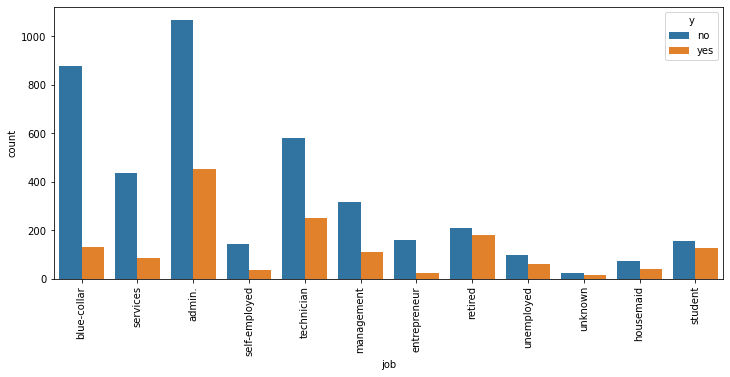

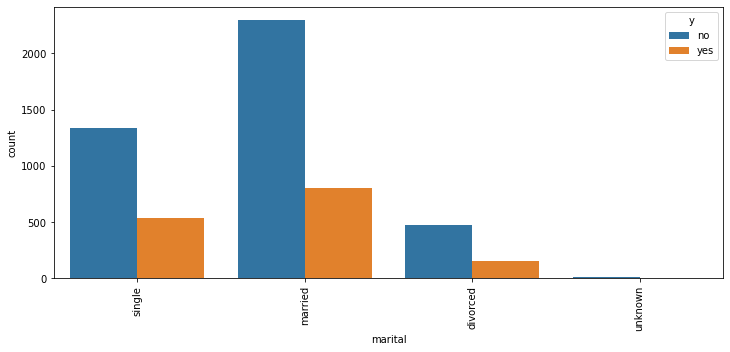

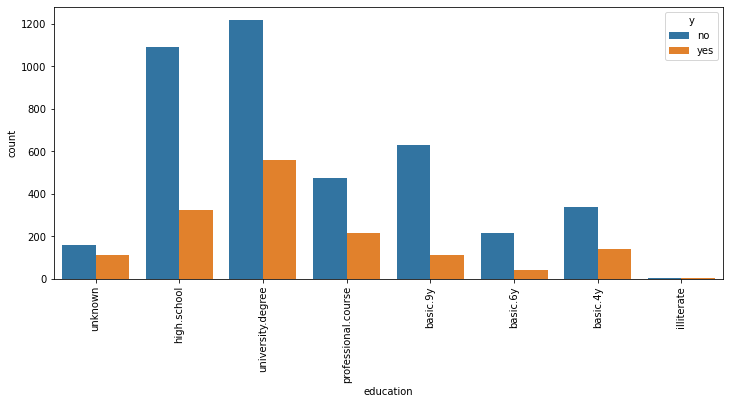

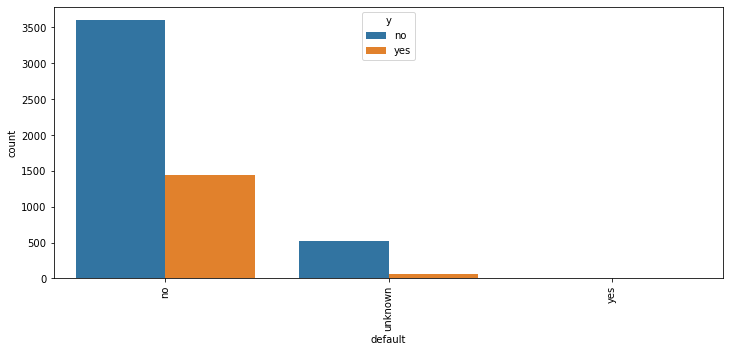

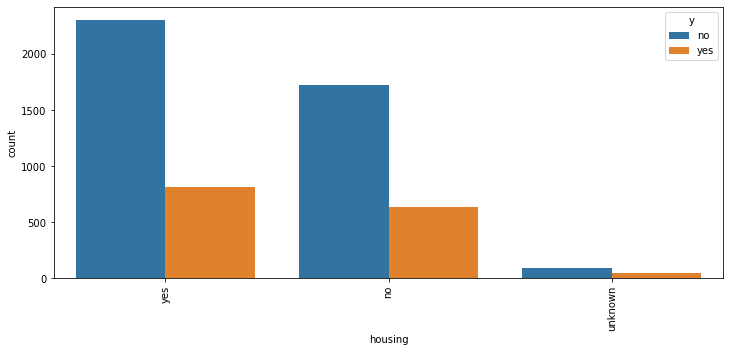

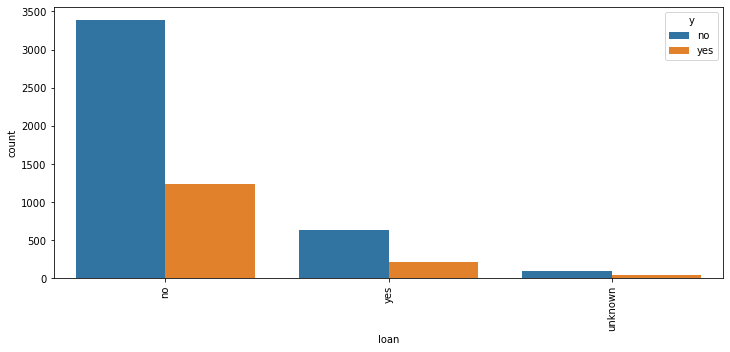

In [22]:
#observing customers only from previous campaign
previous = data[data['poutcome'] != 'nonexistent']
for i in custInfo:
    if i != 'age':
        VisualizeConverted(previous,i)

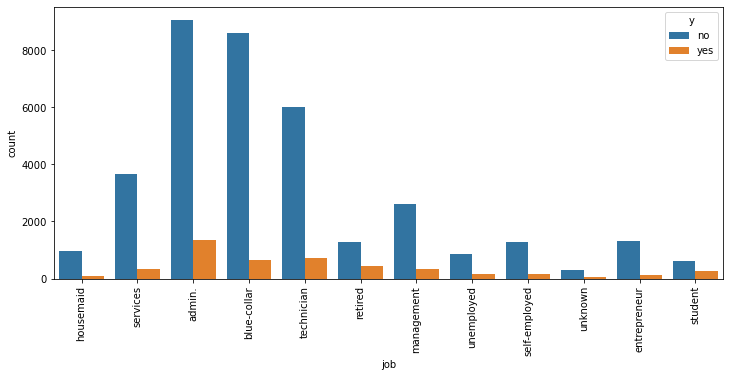

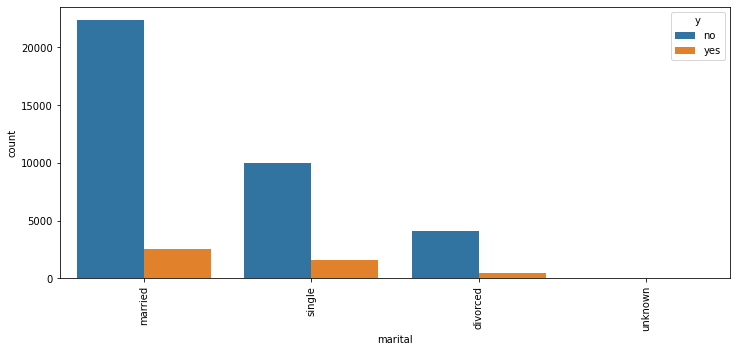

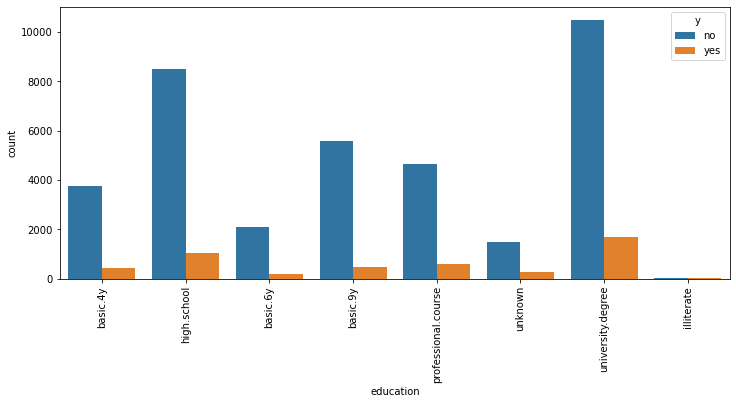

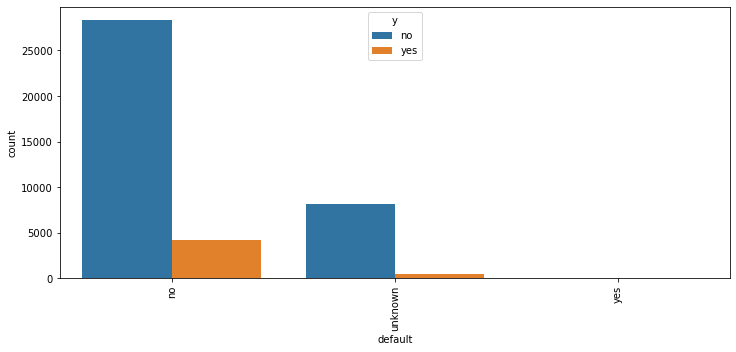

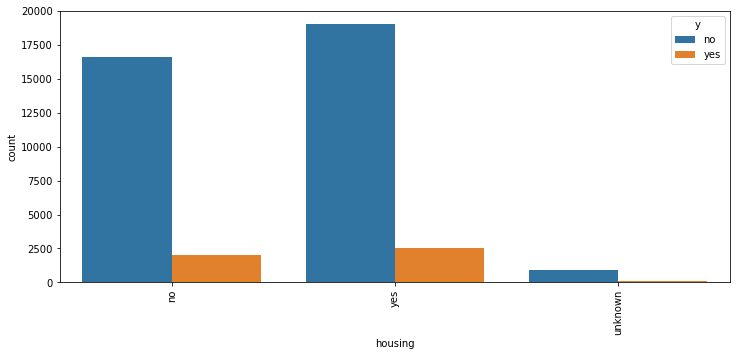

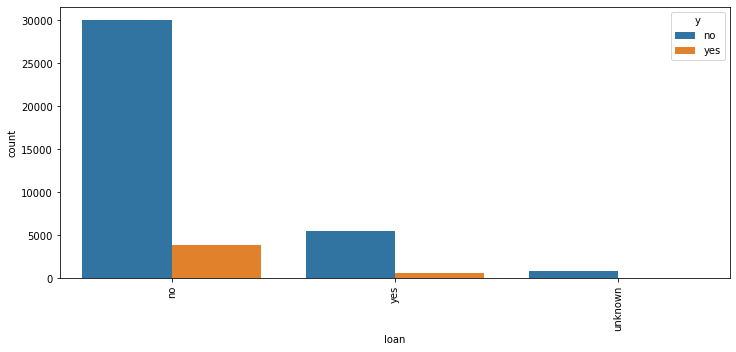

In [23]:
for i in custInfo:
    if i != 'age':
        VisualizeConverted(data,i)

C:\Users\shiryas\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\shiryas\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


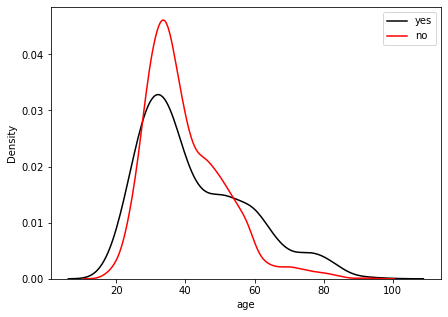

In [24]:
VisualizeConvertedNumeric(previous,'age')

C:\Users\shiryas\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\shiryas\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


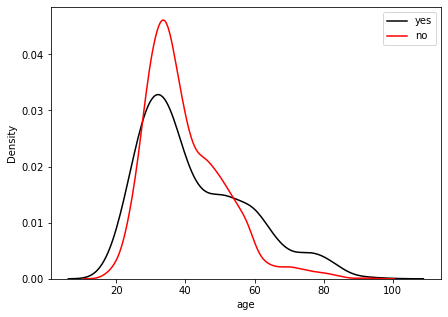

In [25]:
VisualizeConvertedNumeric(data,'age')

### Related to contact activity information

In [26]:
custAct = ['contact','month','day_of_week']

--------------------- contact ---------------------
cellular     26144
telephone    15044
Name: contact, dtype: int64
--------------------- month ---------------------
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64
--------------------- day_of_week ---------------------
thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64


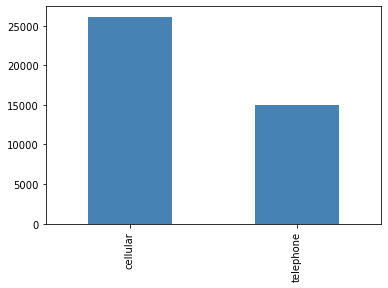

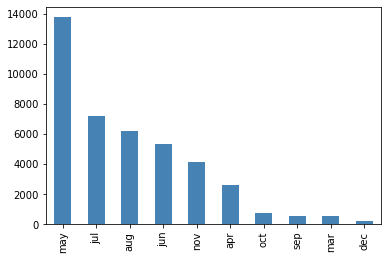

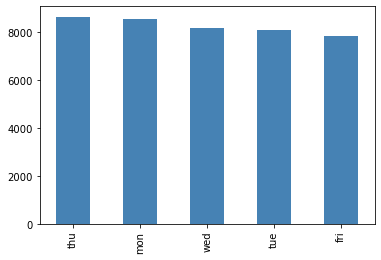

In [27]:
Distribution(data,custAct,cat_list,num_list)

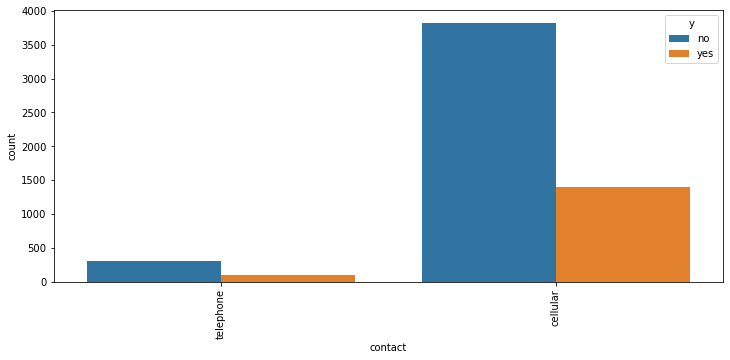

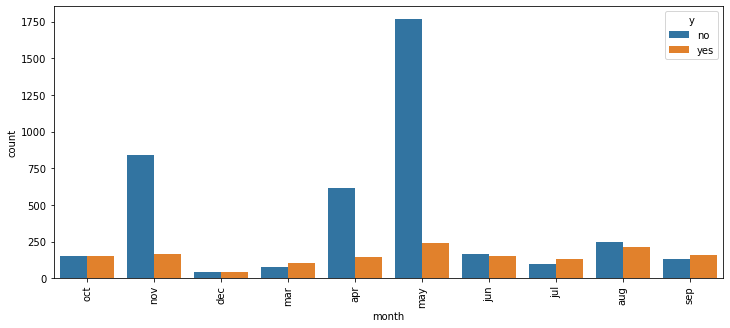

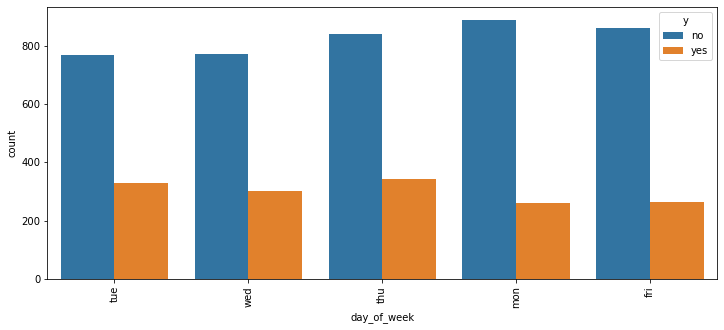

In [28]:
for i in custAct:
    VisualizeConverted(previous,i)

In [29]:
Joblistc = list(previous.contact.unique())
JobSuccessRate(previous,Joblistc,'contact')

Success Rate for  telephone  in campaign 0.25
Success Rate for  cellular  in campaign 0.27


In [30]:
Joblistm = list(previous.month.unique())
JobSuccessRate(previous,Joblistm,'month')

Success Rate for  oct  in campaign 0.5
Success Rate for  nov  in campaign 0.17
Success Rate for  dec  in campaign 0.51
Success Rate for  mar  in campaign 0.57
Success Rate for  apr  in campaign 0.19
Success Rate for  may  in campaign 0.12
Success Rate for  jun  in campaign 0.47
Success Rate for  jul  in campaign 0.57
Success Rate for  aug  in campaign 0.47
Success Rate for  sep  in campaign 0.54


In [31]:
Joblistw = list(previous.day_of_week.unique())
JobSuccessRate(previous,Joblistw,'day_of_week')

Success Rate for  tue  in campaign 0.3
Success Rate for  wed  in campaign 0.28
Success Rate for  thu  in campaign 0.29
Success Rate for  mon  in campaign 0.23
Success Rate for  fri  in campaign 0.23


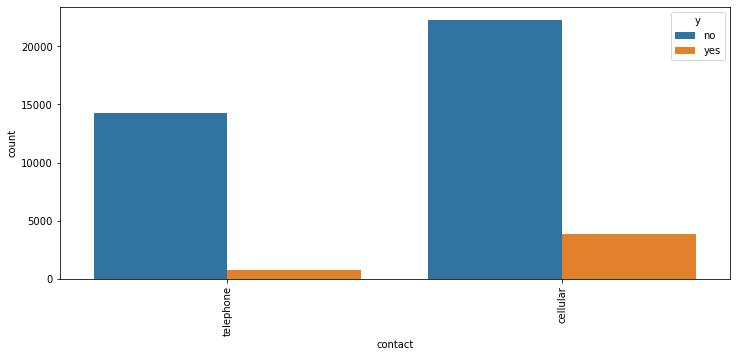

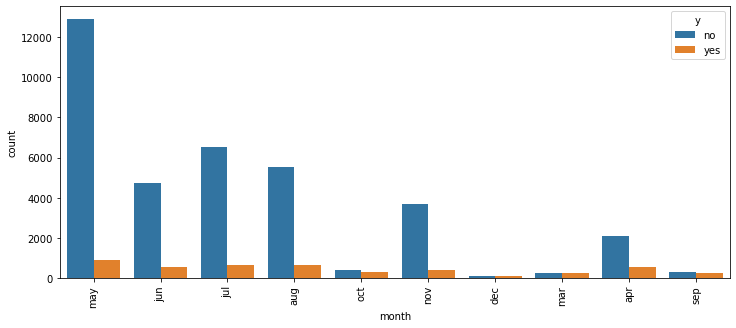

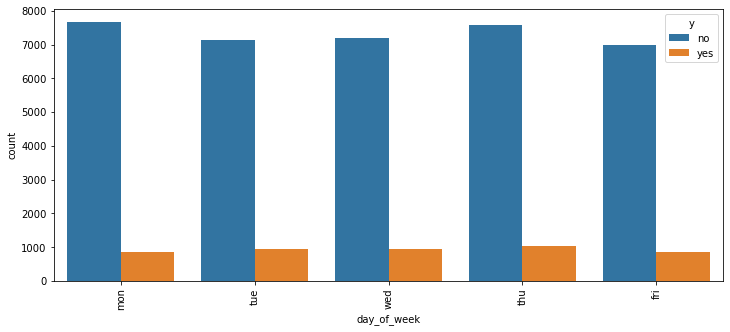

In [32]:
for i in custAct:
    VisualizeConverted(data,i)

In [33]:
JobSuccessRate(data,Joblistc,'contact')

Success Rate for  telephone  in campaign 0.05
Success Rate for  cellular  in campaign 0.15


In [34]:
JobSuccessRate(data,Joblistm,'month')

Success Rate for  oct  in campaign 0.44
Success Rate for  nov  in campaign 0.1
Success Rate for  dec  in campaign 0.49
Success Rate for  mar  in campaign 0.51
Success Rate for  apr  in campaign 0.2
Success Rate for  may  in campaign 0.06
Success Rate for  jun  in campaign 0.11
Success Rate for  jul  in campaign 0.09
Success Rate for  aug  in campaign 0.11
Success Rate for  sep  in campaign 0.45


In [35]:
JobSuccessRate(data,Joblistw,'day_of_week')

Success Rate for  tue  in campaign 0.12
Success Rate for  wed  in campaign 0.12
Success Rate for  thu  in campaign 0.12
Success Rate for  mon  in campaign 0.1
Success Rate for  fri  in campaign 0.11


### Related to campaign activity

In [36]:
#campaign - number of contacts
custCam = ['campaign','pdays','previous','poutcome']

--------------------- campaign ---------------------
1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: campaign, dtype: int64
--------------------- pdays ---------------------
999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, 

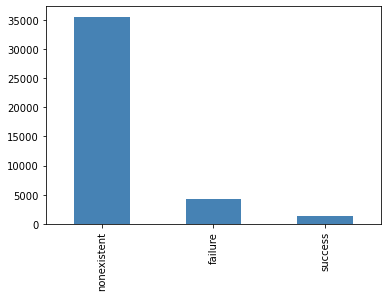

In [37]:
Distribution(data,custCam,cat_list,num_list)

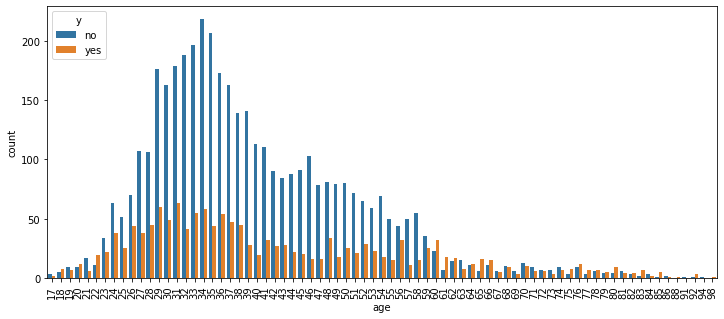

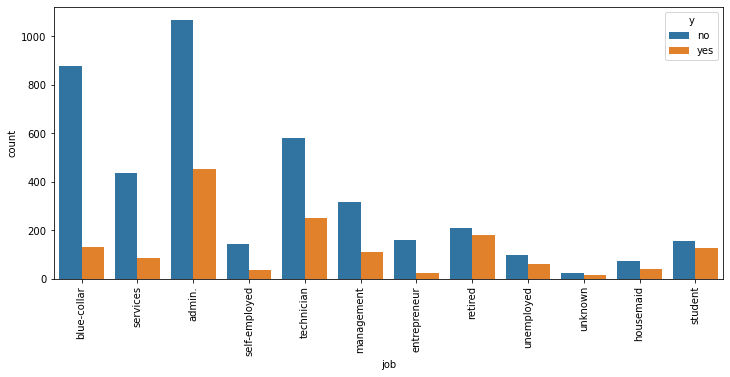

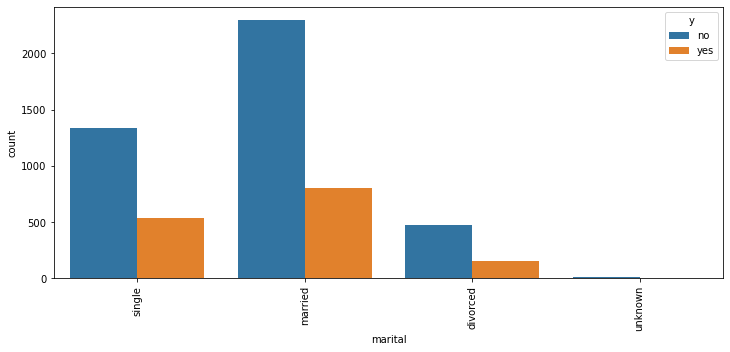

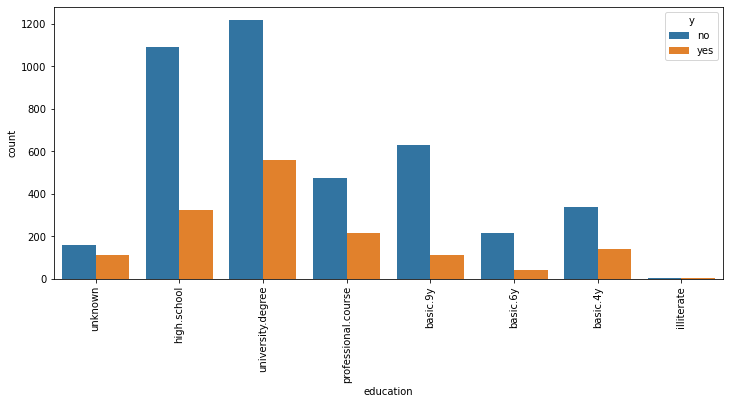

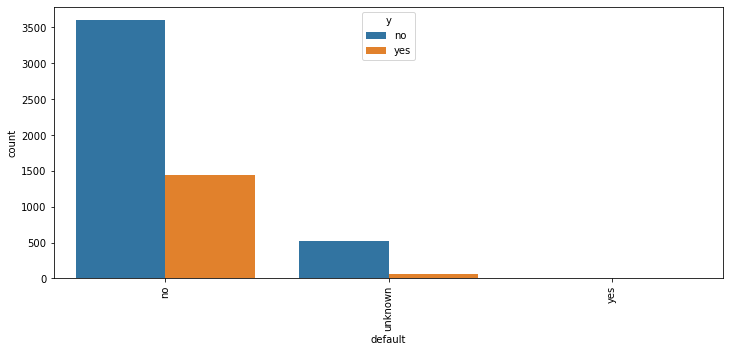

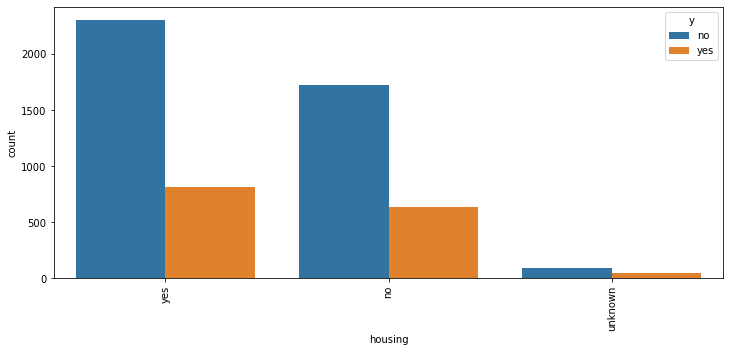

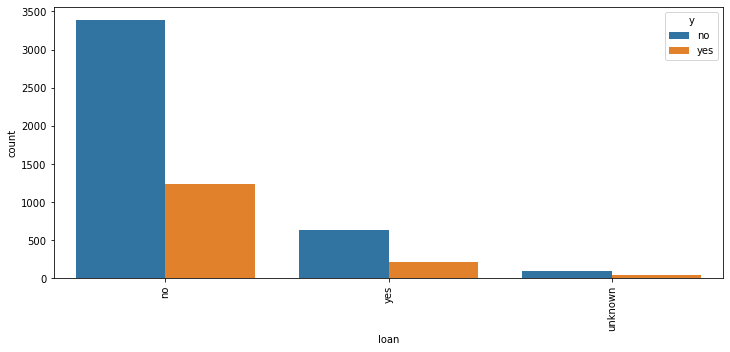

In [38]:
for i in custInfo:
    if i != 'poutcome':
        VisualizeConverted(previous,i)

In [39]:
Joblistj = list(previous.job.unique())
JobSuccessRate(previous,Joblistj,'job')

Success Rate for  blue-collar  in campaign 0.13
Success Rate for  services  in campaign 0.16
Success Rate for  admin.  in campaign 0.3
Success Rate for  self-employed  in campaign 0.19
Success Rate for  technician  in campaign 0.3
Success Rate for  management  in campaign 0.26
Success Rate for  entrepreneur  in campaign 0.12
Success Rate for  retired  in campaign 0.46
Success Rate for  unemployed  in campaign 0.38
Success Rate for  unknown  in campaign 0.41
Success Rate for  housemaid  in campaign 0.35
Success Rate for  student  in campaign 0.45


In [40]:
martiallist = list(previous.marital.unique())
JobSuccessRate(previous,martiallist,'marital')

Success Rate for  single  in campaign 0.29
Success Rate for  married  in campaign 0.26
Success Rate for  divorced  in campaign 0.24
Success Rate for  unknown  in campaign 0.22


In [41]:
listl = list(previous.loan.unique())
JobSuccessRate(previous,listl,'loan')

Success Rate for  no  in campaign 0.27
Success Rate for  yes  in campaign 0.25
Success Rate for  unknown  in campaign 0.32


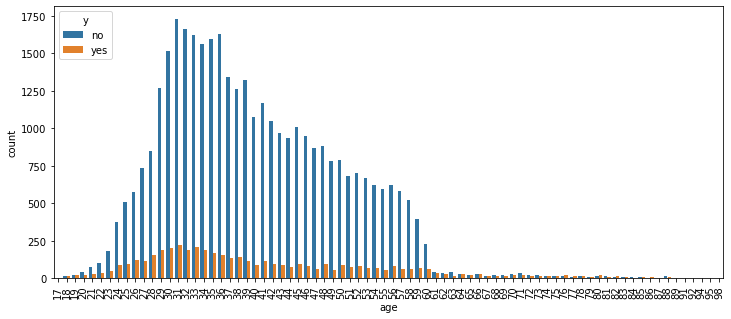

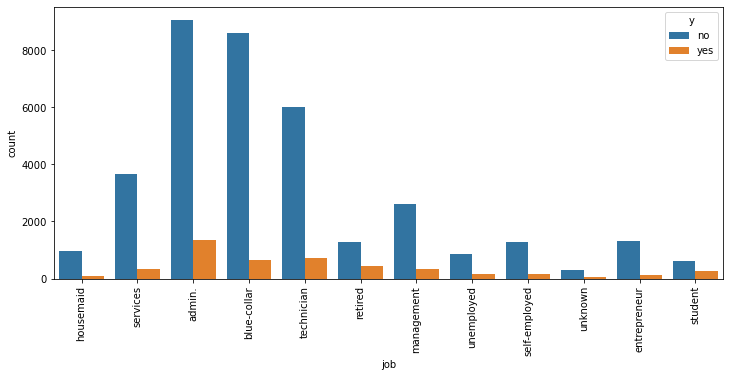

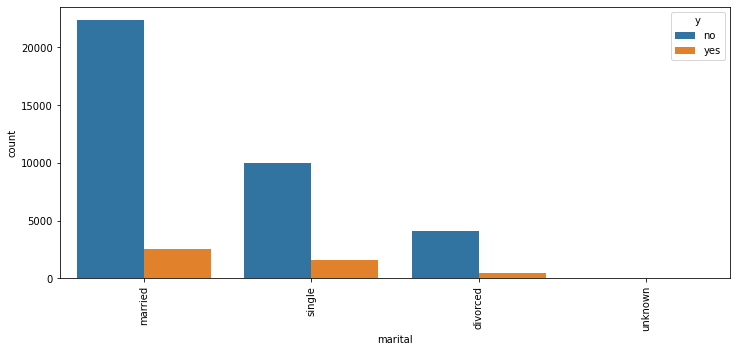

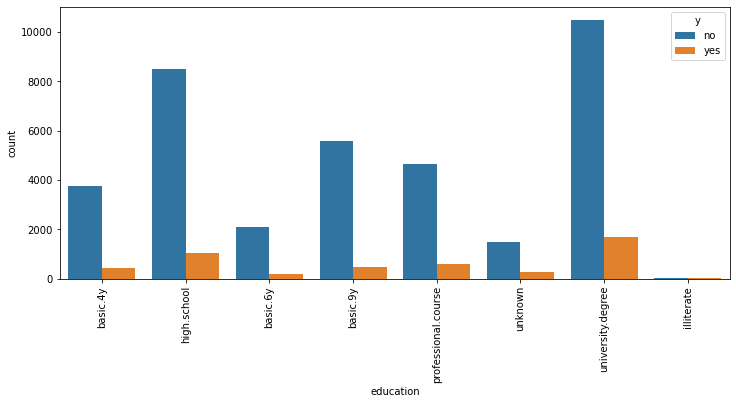

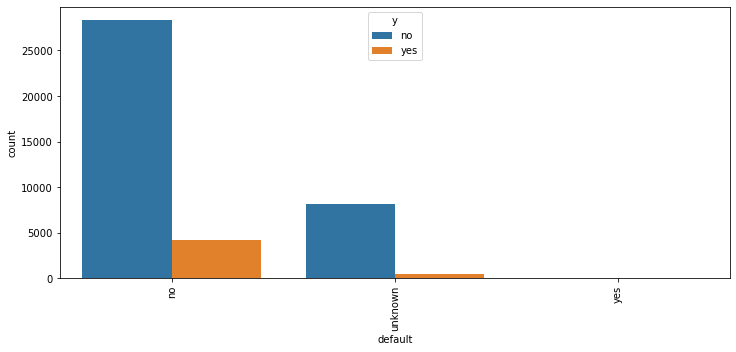

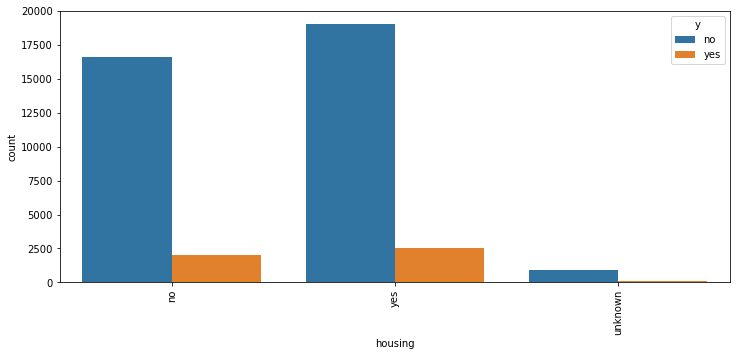

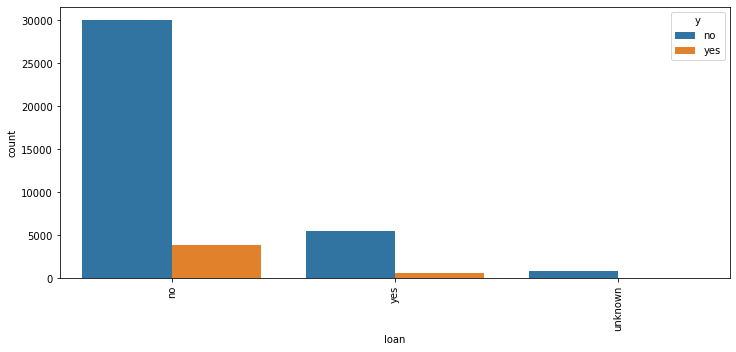

In [42]:
for i in custInfo:
    if i != 'poutcome':
        VisualizeConverted(data,i)

In [43]:
#For whole data
JobSuccessRate(data,Joblistj,'job')

Success Rate for  blue-collar  in campaign 0.07
Success Rate for  services  in campaign 0.08
Success Rate for  admin.  in campaign 0.13
Success Rate for  self-employed  in campaign 0.1
Success Rate for  technician  in campaign 0.11
Success Rate for  management  in campaign 0.11
Success Rate for  entrepreneur  in campaign 0.09
Success Rate for  retired  in campaign 0.25
Success Rate for  unemployed  in campaign 0.14
Success Rate for  unknown  in campaign 0.11
Success Rate for  housemaid  in campaign 0.1
Success Rate for  student  in campaign 0.31


In [44]:
JobSuccessRate(data,martiallist,'marital')

Success Rate for  single  in campaign 0.14
Success Rate for  married  in campaign 0.1
Success Rate for  divorced  in campaign 0.1
Success Rate for  unknown  in campaign 0.15


In [45]:
JobSuccessRate(data,listl,'loan')

Success Rate for  no  in campaign 0.11
Success Rate for  yes  in campaign 0.11
Success Rate for  unknown  in campaign 0.11


##### High conversion rate  variables
- Younger and Older customers are most likely to get converted in comparision with middle age 
- Retired/student have good conversion rate
- Singles have high chances of conversion
- If customer who has high school education
- If customer who has no credit in default
- If customer who has cellular contact
- If contacted in Month march/sep/dec
- If called on Weekday Tue/Wed/Thur
- If there is no previous loan

### Related to social and economics context

In [46]:
custSoc = ['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

In [47]:
Distribution(data,custSoc,cat_list,num_list)

--------------------- emp.var.rate ---------------------
 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64
--------------------- cons.price.idx ---------------------
93.994    7763
93.918    6685
92.893    5794
93.444    5175
94.465    4374
93.200    3616
93.075    2458
92.201     770
92.963     715
92.431     447
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     178
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: cons.price.idx, dtype: int64
--------------------- cons.conf.idx ---------------------
-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.

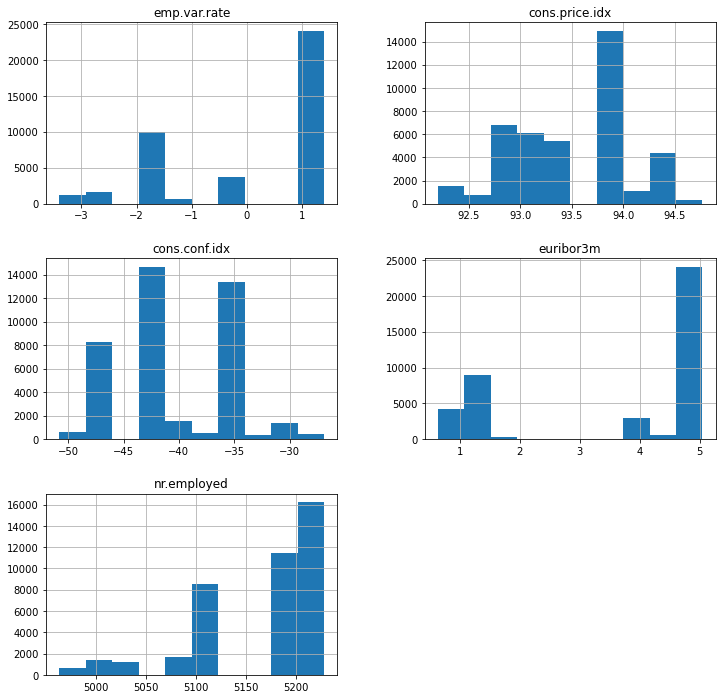

In [48]:
data[custSoc].hist(figsize=(12,12));

In [49]:
data['cons.conf.idx'].value_counts()

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

In [50]:
data[num_list].describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Correlation

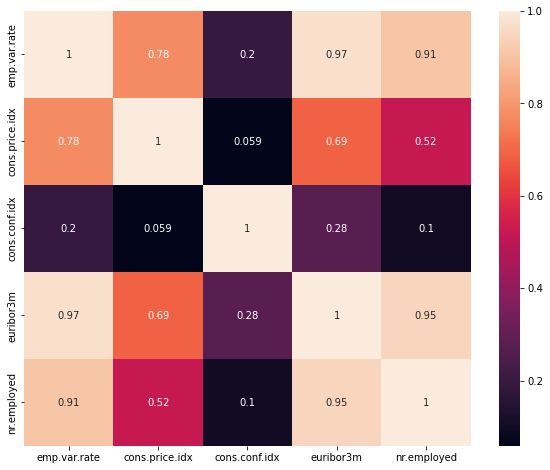

In [51]:
#checking correlation between economic context numeric variables
plt.figure(figsize=(10,8))
# heatmap
sns.heatmap(data[custSoc].corr(method= 'pearson'), annot=True)
plt.show()

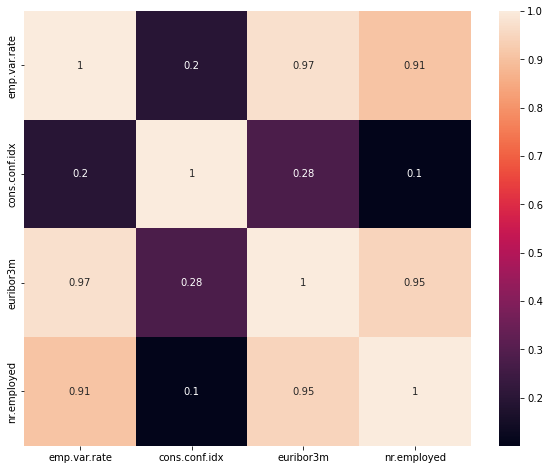

In [52]:
#there is high correlation of 'cons.price.idx' with other economic numeric variables
# there is high correlation between nr.employed and emp.var.rate , euribor3m
custSoc = ['emp.var.rate','cons.conf.idx','euribor3m','nr.employed']
plt.figure(figsize=(10,8))
# heatmap
sns.heatmap(data[custSoc].corr(method= 'pearson'), annot=True)
plt.show()

In [53]:
#Checking correlations of numeric values
#data.corr(method= 'pearson')

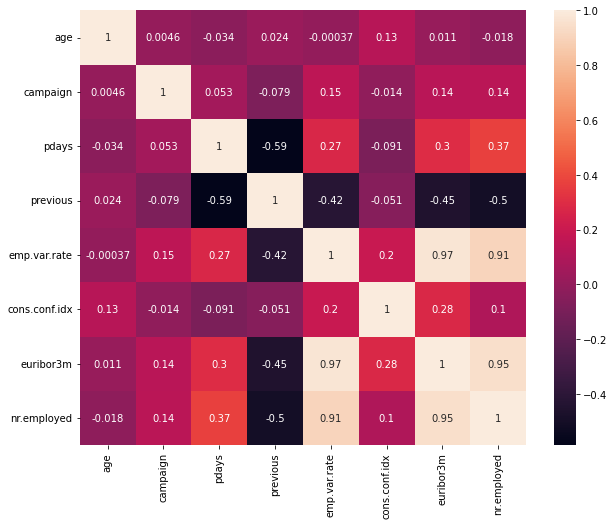

In [54]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))
# heatmap
sns.heatmap(data[['age','campaign','pdays','previous','emp.var.rate','cons.conf.idx','euribor3m','nr.employed']].corr(method= 'pearson'), annot=True)
plt.show()

# Data Cleanning & Encoding

In [55]:
def Data_Cleaning(df):
    cat_list = []
    num_list = []
    for column in df:
        if is_string_dtype(df[column]):
            cat_list.append(column)
        if is_numeric_dtype(df[column]):
            num_list.append(column)
    return(cat_list,num_list)
cat_list,num_list = Data_Cleaning(data)

In [56]:
lists = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed']

In [122]:
##Ordinal Encoding for target variable
order = OrdinalEncoder()
order.fit([data_encoded1['y']])
data_encoded1['y'] = order.fit_transform(data_encoded1[['y']])

In [57]:
def One_Hot_Encoding(df,lists):
    OHE = OneHotEncoder(handle_unknown = 'error')
    OHC = OHE.fit_transform(df[lists]).toarray()
    OHFN = OHE.get_feature_names(lists)
    OHEdf = pd.DataFrame(OHC, columns=OHFN).astype(int).reset_index(drop=True)
    df_transformed = pd.concat([df,OHEdf],axis=1).reset_index(drop=True)
    data2 = df_transformed.drop(labels = lists, axis=1)
    return(data2)

In [58]:
enList = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_encoded1 = data.copy()
data_encoded1 = One_Hot_Encoding(data_encoded1,enList)

C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [59]:
data.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

### Correlation

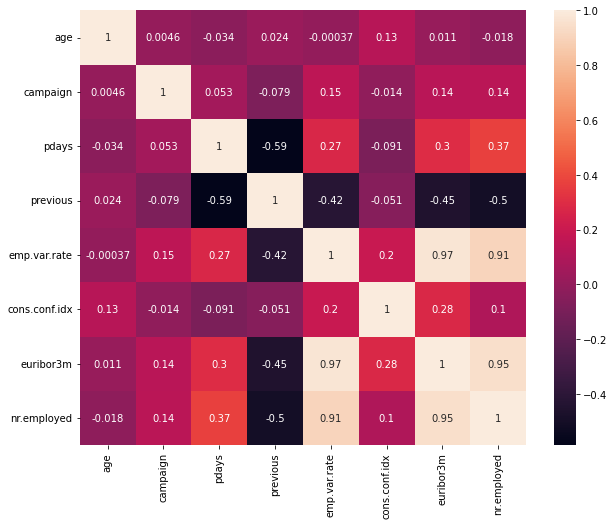

In [99]:
plt.figure(figsize=(10,8))
# heatmap
sns.heatmap(data[['age','campaign','pdays','previous','emp.var.rate','cons.conf.idx','euribor3m','nr.employed']].corr(method= 'pearson'), annot=True)
plt.show()

In [100]:
data_encoded1.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'mo

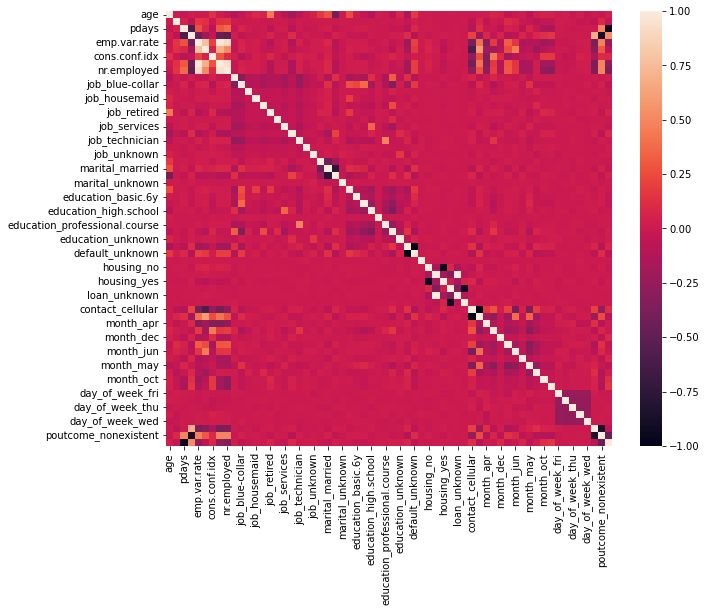

In [98]:
plt.figure(figsize=(10,8))
# heatmap
sns.heatmap(data_encoded1.corr(method= 'pearson'))
plt.show()

In [109]:
corr = data_encoded1.corr(method= 'pearson')
corr.unstack().drop_duplicates().sort_values(ascending = False).reset_index()[:15]

,level_0,level_1,0
0,age,age,1.000000
1,emp.var.rate,euribor3m,0.972245
2,euribor3m,nr.employed,0.945154
3,emp.var.rate,nr.employed,0.906970
4,emp.var.rate,cons.price.idx,0.775334
5,cons.price.idx,euribor3m,0.688230
6,previous,poutcome_failure,0.682608
7,cons.price.idx,contact_telephone,0.591474
8,previous,poutcome_success,0.524045
9,cons.price.idx,nr.employed,0.522034


In [108]:
corr.unstack().drop_duplicates().sort_values(ascending = False).reset_index()[-15:]

,level_0,level_1,0
1817,previous,emp.var.rate,-0.420489
1818,marital_divorced,marital_married,-0.439673
1819,previous,euribor3m,-0.454494
1820,poutcome_nonexistent,poutcome_success,-0.466928
1821,previous,nr.employed,-0.501333
1822,pdays,previous,-0.587514
1823,cons.price.idx,contact_cellular,-0.591474
1824,marital_married,marital_single,-0.773785
1825,poutcome_failure,poutcome_nonexistent,-0.853119
1826,previous,poutcome_nonexistent,-0.878776


# Feature selection 

In [64]:
X=data_encoded1.drop('y', axis=1)

In [65]:
# Putting response variable to y
Y = data_encoded1['y']
#X=data_encoded.drop('y', axis=1)

In [128]:
def SMOTEOversampling(X_train12, X_test12,y_train12,y_test12):
    print('this is the pre- over sampling distribution: ')
    print(sorted(Counter(y_train12).items()))
    X_train12=np.array(X_train12)
    y_train12= np.array(y_train12)
    cc = SMOTE()
    Xc12, yc12 = cc.fit_resample(X_train12, y_train12)  
    print('this is the post- over sampling distribution: ')
    print(sorted(Counter(yc12).items()))
    return(Xc12,yc12,X_test12,y_test12)

In [67]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=0)

In [68]:
#including sales value as feature
Xc1,yc1,X_test,y_test = SplitData(X_train, X_test,y_train,y_test)
#y_pred,rfc = RandomForestModel(Xc1,yc1,X_test,y_test)

this is the pre- undersampling distribution: 
[('no', 25579), ('yes', 3252)]
this is the post- undersampling distribution: 
[('no', 25579), ('yes', 25579)]


## Recurcive Feature Elimination Method

In [69]:
#Recurcive Feature Elimination 
model1 = LogisticRegression(max_iter=20)
#Initializing RFE model
rfe = RFE(model1)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,Y)  
#Fitting the data to model
model1.fit(X_rfe,Y)
print(rfe.support_)
print(rfe.ranking_)

C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

[ True  True  True  True  True  True  True  True  True  True  True False
 False False  True False  True  True False False False False  True  True
 False False False  True False False False  True False  True  True False
 False False False False False False  True  True  True False False False
 False  True  True False  True  True False  True False False False  True
  True  True]
[ 1  1  1  1  1  1  1  1  1  1  1 15 22 29  1 32  1  1 19 18 25 16  1  1
 28 14  8  1 17 30 24  1 10  1  1 31 13 27  3  5 26 21  1  1  1 12  7  2
 20  1  1  6  1  1 23  1  4 11  9  1  1  1]


C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

In [180]:
#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    #X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)
    model = LogisticRegression(max_iter=150)
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(Xc1,yc1)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,yc1)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RFE was fitted without feature names
  warnings.warn(
C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html


C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RFE was fitted without feature names
  warnings.warn(
C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html


C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RFE was fitted without feature names
  warnings.warn(


Optimum number of features: 1
Score with 1 features: 0.896496


In [70]:
cols = list(X.columns)
model = LogisticRegression()
#Initializing RFE model
rfe = RFE(estimator = model, n_features_to_select=15)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,Y)  
#Fitting the data to model
model.fit(X_rfe,Y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

Index(['previous', 'euribor3m', 'job_retired', 'job_student',
       'default_unknown', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_oct', 'month_sep', 'day_of_week_mon',
       'poutcome_failure', 'poutcome_success'],
      dtype='object')


## Varience Inflation Factor 

In [71]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
# considering 15 important variables from RFE method
cols = ['previous', 'euribor3m', 'job_retired', 'job_student',
       'default_unknown', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_oct', 'month_sep', 'day_of_week_mon',
       'poutcome_failure', 'poutcome_success']
vif = pd.DataFrame()
vif['Features'] = X[cols].columns
vif['VIF'] = [variance_inflation_factor(X[cols].values, i) for i in range(X[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,previous,5.38
13,poutcome_failure,3.83
1,euribor3m,2.89
14,poutcome_success,2.64
9,month_may,1.69
6,month_jul,1.62
7,month_jun,1.40
4,default_unknown,1.33
12,day_of_week_mon,1.22
2,job_retired,1.06


# Building Model

## Hyper parameter tunning

In [130]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-1,0.01, 1,10,100),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 500,1000]
    }
]
logModel = LogisticRegression()
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train,y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
81 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueErr

In [77]:
best_clf.best_estimator_

LogisticRegression(C=0.01, max_iter=500, penalty='none')

## Logistic Regression Model

In [78]:
def LogisticRegressionModel(X_train,y_train,X_test,y_test,x,y):
    # instantiate the model (using the default parameters)
    logreg = LogisticRegression(C=0.01, max_iter=500, penalty='none')
    # fit the model with data
    logreg.fit(X_train,y_train)
    y_pred=logreg.predict(X_test)      
    logreg_accuracy = metrics.accuracy_score(y_pred, y_test)  
    logreg_f1_score = metrics.f1_score(y_pred,y_test,average='micro') 
    logreg_recall_score = metrics.recall_score(y_pred,y_test,average='micro')       
    print ("logreg SMOTETomek: ", logreg_accuracy) 
    print ('logreg F1 Score: ',logreg_f1_score)
    print ('logreg recall Score: ',logreg_recall_score)
    logreg_mse = np.sqrt(mean_squared_error(y_test,y_pred))
    print("logreg RMSE for prediction: %.4f" % logreg_mse)    
    
    y_train_pred = logreg.predict(X_train)
    print("Accuracy for train data")
    print(classification_report(y_train, y_train_pred)) 
    print("Accuracy for test data")
    print(classification_report(y_test, y_pred))
    #X = StandardScaler().fit_transform(Xc1)
    metrics.plot_confusion_matrix(logreg, X_test, y_test,
                             #display_labels=class_names,
                             cmap=plt.cm.Blues,
                             normalize='true')
    return(y_pred,logreg)

## Statistical Logistic Regression

In [133]:
def StatsLogisticRegression(Xc,yc,X_test1,y_test1,x,y):
    X_train_c = add_constant(Xc)
    X_test_c = add_constant(X_test1)
    model = sm.Logit(np.ravel(yc),X_train_c).fit()
    print(model.summary())
    ORs= np.exp(model.params)
    print(ORs)
    pred = model.predict(exog= X_test_c)
    stat_mse = np.sqrt(mean_squared_error(y_test1,pred))
    print("logreg RMSE for prediction: %.4f" % stat_mse)   
    # plot ROC
    fpr, tpr, thresholdsr = roc_curve(y_true=list(y_test1), y_score=list(pred))
    auc = roc_auc_score(y_true=list(y_test1), y_score=list(pred))
    stat.roc(fpr=fpr, tpr=tpr, auc=auc, shade_auc=True, per_class=True, legendpos='upper center', 
             legendanchor=(0.5, 1.08), legendcols=3)
    plt.figure(figsize = (5, 5))
    sns.scatterplot(x = fpr, y = tpr)
    sns.lineplot(x = fpr, y = tpr)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green')
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

    return(model,pred)

## SMOTE

In [129]:
y = data_encoded1['y'].reset_index(drop=True)
x= X[[ 'euribor3m', 'job_retired', 'job_student',
       'default_unknown', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_oct', 'month_sep', 'day_of_week_mon',
       'poutcome_failure', 'poutcome_success']]
X_train, X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
Xc1,yc1,X_test,y_test = SMOTEOversampling(X_train, X_test,y_train,y_test)


this is the pre- over sampling distribution: 
[(0.0, 25579), (1.0, 3252)]
this is the post- over sampling distribution: 
[(0.0, 25579), (1.0, 25579)]


C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


logreg SMOTETomek:  0.780610180464514
logreg F1 Score:  0.780610180464514
logreg recall Score:  0.780610180464514
logreg RMSE for prediction: 0.4684
Accuracy for train data
              precision    recall  f1-score   support

         0.0       0.71      0.80      0.75     25579
         1.0       0.77      0.68      0.72     25579

    accuracy                           0.74     51158
   macro avg       0.74      0.74      0.74     51158
weighted avg       0.74      0.74      0.74     51158

Accuracy for test data
              precision    recall  f1-score   support

         0.0       0.95      0.80      0.87     10969
         1.0       0.29      0.66      0.40      1388

    accuracy                           0.78     12357
   macro avg       0.62      0.73      0.63     12357
weighted avg       0.87      0.78      0.81     12357



C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


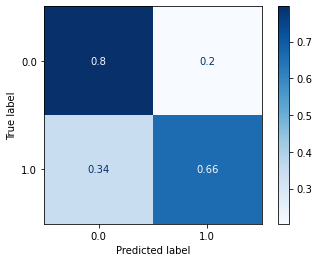

In [124]:
y_pred,logreg = LogisticRegressionModel(Xc1,yc1,X_test,y_test,x,y)

## Test Result for sklearn Model

In [138]:
# Getting the Predicted values on the train set
finaltestdataLG = X_test.copy()
finaltestdataLG['Original_y'] = y_test
finaltestdataLG['Predicted_prob'] =  y_pred
finaltestdataLG[finaltestdataLG.Original_y == 1][:20]

,euribor3m,job_retired,job_student,default_unknown,month_dec,month_jul,month_jun,month_mar,month_may,month_oct,month_sep,day_of_week_mon,poutcome_failure,poutcome_success,Original_y,Predicted_prob
15500,4.957,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0,0.0
15195,4.958,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0,0.0
39660,0.683,0,0,0,0,0,0,0,1,0,0,0,0,1,1.0,1.0
41134,1.041,0,1,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0
40805,0.878,0,0,0,0,0,0,0,0,0,1,0,0,0,1.0,1.0
27103,4.021,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0
37604,0.861,1,0,0,0,0,0,0,0,0,0,1,0,0,1.0,1.0
34506,1.266,0,0,0,0,0,0,0,1,0,0,0,0,0,1.0,1.0
39896,0.732,0,0,0,0,0,1,0,0,0,0,0,0,1,1.0,1.0
37245,0.881,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,1.0


In [139]:
lg = finaltestdataLG[finaltestdataLG.Original_y == 1]
lg.Original_y.value_counts()

1.0    1388
Name: Original_y, dtype: int64

In [140]:
lg.Predicted_prob.value_counts()

1.0    914
0.0    474
Name: Predicted_prob, dtype: int64

## Test Results for statistical model

With Stastistical model you are able to generate probability for target variable

C:\Users\shiryas\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.545352
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                51158
Model:                          Logit   Df Residuals:                    51143
Method:                           MLE   Df Model:                           14
Date:                Fri, 05 Aug 2022   Pseudo R-squ.:                  0.2132
Time:                        15:39:46   Log-Likelihood:                -27899.
converged:                       True   LL-Null:                       -35460.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3990      0.031     45.804      0.000       1.339       1.459
x1            -0.4588      0.

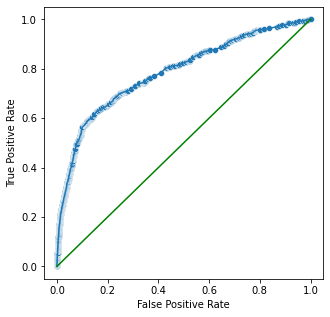

In [134]:
model,pred = StatsLogisticRegression(Xc1,yc1,X_test,y_test,x,y)

In [135]:
# Getting the Predicted values on the train set
finaltestdata = X_test.copy()
finaltestdata['Original_y'] = y_test
finaltestdata['Predicted_prob'] =  pred
#df_result= pd.DataFrame({'Original'y_test, 'Converted_prob':pred})
#df_result['Prospect ID'] = X_test.index
finaltestdata

,euribor3m,job_retired,job_student,default_unknown,month_dec,month_jul,month_jun,month_mar,month_may,month_oct,month_sep,day_of_week_mon,poutcome_failure,poutcome_success,Original_y,Predicted_prob
15500,4.957,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0,0.354743
29034,1.405,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.680127
11199,4.961,0,0,1,0,0,1,0,0,0,0,0,0,0,0.0,0.276779
22247,4.963,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.293571
27180,4.021,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.390336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20920,4.964,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.293476
15744,4.960,0,0,0,0,1,0,0,0,0,0,1,0,0,1.0,0.318209
34965,1.250,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.530156
4644,4.858,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.177318


In [155]:
finaltestdata = finaltestdata.reset_index(drop=True)
finaltestdata.Predicted_prob = round(finaltestdata.Predicted_prob*100,0)
sm = finaltestdata[finaltestdata.Original_y == 1]
sm =sm.reset_index(drop=True)

In [156]:
sm[sm.Predicted_prob >= 0.50][:10]

,euribor3m,job_retired,job_student,default_unknown,month_dec,month_jul,month_jun,month_mar,month_may,month_oct,month_sep,day_of_week_mon,poutcome_failure,poutcome_success,Original_y,Predicted_prob
0,4.957,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0,35.0
1,4.958,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0,35.0
2,0.683,0,0,0,0,0,0,0,1,0,0,0,0,1,1.0,89.0
3,1.041,0,1,0,0,0,0,0,0,0,0,0,0,0,1.0,77.0
4,0.878,0,0,0,0,0,0,0,0,0,1,0,0,0,1.0,81.0
5,4.021,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,39.0
6,0.861,1,0,0,0,0,0,0,0,0,0,1,0,0,1.0,76.0
7,1.266,0,0,0,0,0,0,0,1,0,0,0,0,0,1.0,53.0
8,0.732,0,0,0,0,0,1,0,0,0,0,0,0,1,1.0,95.0
9,0.881,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,93.0


In [158]:
leads=[]
for i in range(len(finaltestdata)):
    if finaltestdata.Predicted_prob[i] <=35:
        leads.append("Cold Leads")
    elif (finaltestdata.Predicted_prob[i] > 35) & (finaltestdata.Predicted_prob[i] <= 70):
        leads.append("Warm Leads")
    else:
        leads.append("Hot Leads ")

In [159]:
finaltestdata['Leads'] = leads
finaltestdata[:10]

,euribor3m,job_retired,job_student,default_unknown,month_dec,month_jul,month_jun,month_mar,month_may,month_oct,month_sep,day_of_week_mon,poutcome_failure,poutcome_success,Original_y,Predicted_prob,Leads
0,4.957,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0,35.0,Cold Leads
1,1.405,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,68.0,Warm Leads
2,4.961,0,0,1,0,0,1,0,0,0,0,0,0,0,0.0,28.0,Cold Leads
3,4.963,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,29.0,Cold Leads
4,4.021,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,39.0,Warm Leads
5,1.281,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,53.0,Warm Leads
6,4.856,0,0,1,0,0,0,0,1,0,0,0,0,0,0.0,15.0,Cold Leads
7,4.961,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,33.0,Cold Leads
8,4.958,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0,35.0,Cold Leads
9,1.266,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,43.0,Warm Leads


In [160]:
finaltestdata.Leads.value_counts()

Cold Leads    7512
Warm Leads    3462
Hot Leads     1383
Name: Leads, dtype: int64

<AxesSubplot:>

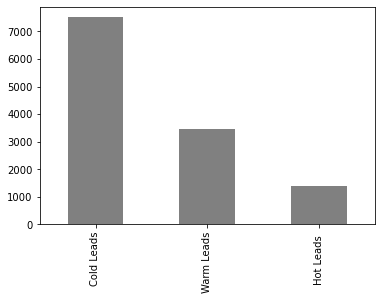

In [165]:
finaltestdata.Leads.value_counts().plot(kind='bar', color='grey')